In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing

params = {}

sns.set_theme(palette="colorblind", rc=params)

# Enable automatic conversion between Pandas dataframes and R data.frames
pandas2ri.activate()

# utils = importr("utils")
# utils.chooseCRANmirror(ind=1)  # select the first mirror in the list

# utils.install_packages("FindIt")

In [2]:
# Import your required R packages
base = importr("base")
findit = importr("FindIt")

In [3]:
# Access the dataset as a pandas DataFrame (optional, if you need to manipulate it in Python)
with localconverter(ro.default_converter + pandas2ri.converter):
    Carlson_df = ro.conversion.rpy2py(ro.r["Carlson"])

In [4]:
Carlson_df.dtypes

won                  int32
newRecordF        category
promise           category
coeth_voting      category
relevantdegree    category
respcodeS            int32
contestresp        float64
dtype: object

In [5]:
# Run your R code
ro.r(
    """
library(FindIt)
Carlson$newRecordF <- factor(Carlson$newRecordF, ordered=TRUE, levels=c("YesLC", "YesDis","YesMP", "noLC","noDis","noMP","noBusi"))
Carlson$promise <- factor(Carlson$promise, ordered=TRUE, levels=c("jobs","clinic","education"))
Carlson$coeth_voting <- factor(Carlson$coeth_voting, ordered=FALSE, levels=c("0","1"))
Carlson$relevantdegree <- factor(Carlson$relevantdegree, ordered=FALSE, levels=c("0","1"))

fit1 <- CausalANOVA(formula=won ~ newRecordF + promise + coeth_voting + relevantdegree, data=Carlson, pair.id=Carlson$contestresp, diff=TRUE, cluster=Carlson$respcodeS, nway=1)
"""
)


Check: the number of levels for factors and whether they are ordered.
               levels ordered
newRecordF          7    TRUE
promise             3    TRUE
coeth_voting        2   FALSE
relevantdegree      2   FALSE


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<rpy2.robjects.vectors.ListVector object at 0x150656cd0> [19]
R classes: ('CausalANOVA', 'list')
[FloatSexp..., ListSexpV..., ListSexpV..., FloatSexp..., ..., BoolSexpV..., StrSexpVe..., FloatSexp..., LangSexpV...]
  intercept: <class 'numpy.ndarray'>
  array([0.48599908])
<rpy2.robjects.vectors.ListVector object at 0x150656cd0> [19]
R classes: ('CausalANOVA', 'list')
[FloatSexp..., ListSexpV..., ListSexpV..., FloatSexp..., ..., BoolSexpV..., StrSexpVe..., FloatSexp..., LangSexpV...]
<rpy2.robjects.vectors.ListVector object at 0x150656cd0> [19]
R classes: ('CausalANOVA', 'list')
[FloatSexp..., ListSexpV..., ListSexpV..., FloatSexp..., ..., BoolSexpV..., StrSexpVe..., FloatSexp..., LangSexpV...]
  vcov: <class 'numpy.ndarray'>
  array([[ 5.04371222e-04, -1.06884013e-04, -6.19798762e-05,
        -4.48904246e-05, -1.06796620e-04, -1.27675861e-04,
        -5.61444273e-05, -2.55432211e-05, -6.50129895e-06,
         3.20445200e-05,  1.73336034e-06, -1.73336034e-06,
         8.51376935e-06, -

In [6]:
# Print summary of fit1
print(ro.r("summary(fit1)"))

 
Model:
 won ~ newRecordF + promise + coeth_voting + relevantdegree
******
Range:
******
               range
newRecordF     0.164
promise        0.035
coeth_voting   0.065
relevantdegree 0.003
*******************************
Average Marginal Effects (AME):
*******************************
         Factor    Levels base     AME Std.Err  2.5%CI 97.5%CI
     newRecordF     YesLC       0.1641  0.0320  0.1014  0.2268
     newRecordF    YesDis       0.1154  0.0304  0.0559  0.1749
     newRecordF     YesMP       0.0930  0.0300  0.0342  0.1519
     newRecordF

      noLC       0.0292  0.0353 -0.0399  0.0983
     newRecordF     noDis       0.1026  0.0405  0.0232  0.1819
     newRecordF      noMP       0.0730  0.0388 -0.0030  0.1489
     newRecordF    noBusi  ***  0.0000  0.0000  0.0000  0.0000
        promise      jobs      -0.0322  0.0246 -0.0804  0.0161
        promise    clinic      -0.0352  0.0231 -0.0805  0.0101
        promise education  ***  0.0000  0.0000  0.0000  0.0000
   coeth_voting         0      -0.0650  0.0191 -0.1024 -0.0276
   coeth_voting         1  ***  0.0000  0.0000  0.0000  0.0000
 relevantdegree         0       0.0025  0.0210 -0.0387  0.0437
 relevantdegree         1  ***  0.0000  0.0000  0.0000  0.0000

$range
               range
newRecordF     0.164
promise        0.035
coeth_voting   0.065
relevantdegree 0.003

$range.name
[1] "newRecordF"     "promise"        "coeth_voting"   "relevantdegree"

$AME
                        Factor    Levels base     AME Std.Err  2.5%CI 97.5%CI
newRecordF1         newRecordF     YesLC

In [7]:
# If you want to plot, note that plots will appear in your R graphical device. For a more integrated approach, consider saving plots to files in R and displaying them in Python.
ro.r('pdf("fit1_plot.pdf")')  # Save the plot to a file
ro.r("plot(fit1)")
ro.r("dev.off()")  # Close the R plot device

1


In [8]:
# Run your R code
ro.r(
    """
library(FindIt)
Carlson$newRecordF <- factor(Carlson$newRecordF, ordered=TRUE, levels=c("YesLC", "YesDis","YesMP", "noLC","noDis","noMP","noBusi"))
Carlson$promise <- factor(Carlson$promise, ordered=TRUE, levels=c("jobs","clinic","education"))
Carlson$coeth_voting <- factor(Carlson$coeth_voting, ordered=FALSE, levels=c("0","1"))
Carlson$relevantdegree <- factor(Carlson$relevantdegree, ordered=FALSE, levels=c("0","1"))

fit1 <- CausalANOVA(formula=won ~ newRecordF + promise + coeth_voting + relevantdegree, data=Carlson, pair.id=Carlson$contestresp, diff=TRUE, cluster=Carlson$respcodeS, nway=3)
"""
)


Check: the number of levels for factors and whether they are ordered.
               levels ordered
newRecordF          7    TRUE
promise             3    TRUE
coeth_voting        2

   FALSE
relevantdegree      2   FALSE

Analyzing all two-way and three-way interactions...


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<rpy2.robjects.vectors.ListVector object at 0x15fbe7a50> [19]
R classes: ('CausalANOVA', 'list')
[FloatSexp..., ListSexpV..., ListSexpV..., FloatSexp..., ..., BoolSexpV..., StrSexpVe..., FloatSexp..., LangSexpV...]
  intercept: <class 'numpy.ndarray'>
  array([0.48490945])
<rpy2.robjects.vectors.ListVector object at 0x15fbe7a50> [19]
R classes: ('CausalANOVA', 'list')
[FloatSexp..., ListSexpV..., ListSexpV..., FloatSexp..., ..., BoolSexpV..., StrSexpVe..., FloatSexp..., LangSexpV...]
<rpy2.robjects.vectors.ListVector object at 0x15fbe7a50> [19]
R classes: ('CausalANOVA', 'list')
[FloatSexp..., ListSexpV..., ListSexpV..., FloatSexp..., ..., BoolSexpV..., StrSexpVe..., FloatSexp..., LangSexpV...]
  vcov: <class 'numpy.ndarray'>
  array([[ 8.70081264e-04, -1.57590790e-04, -1.63808483e-04, ...,
         1.37557237e-04, -3.24092525e-05,  1.05147984e-04],
       [-1.57590790e-04,  5.15613992e-04, -3.65171450e-05, ...,
        -2.17355706e-05, -3.14559367e-06, -2.48811643e-05],
       [-1.638

In [9]:
# Print summary of fit1
print(ro.r("summary(fit1)"))

 
Model:
 won ~ . * . * .
<environment: 0x15c14f580>
******
Range:
******
                                       range
newRecordF                             0.180
promise                                0.016
coeth_voting                           0.036
relevantdegree                         0.029
newRecordF:promise                     0.280
newRecordF:coeth_voting                0.183
newRecordF:relevantdegree              0.081
promise:coeth_voting                   0.043
promise:relevantdegree                 0.051
coeth_voting:relevantdegree            0.040
newRecordF:promise:coeth_voting       

 0.163
newRecordF:promise:relevantdegree      0.268
newRecordF:coeth_voting:relevantdegree 0.131
promise:coeth_voting:relevantdegree    0.021
*******************************
Average Marginal Effects (AME):
*******************************
         Factor    Levels base     AME Std.Err  2.5%CI 97.5%CI
     newRecordF     YesLC       0.1800  0.0388  0.1040  0.2559
     newRecordF    YesDis       0.1388  0.0309  0.0783  0.1993
     newRecordF     YesMP       0.1360  0.0332  0.0710  0.2010
     newRecordF      noLC       0.0340  0.0394 -0.0432  0.1112
     newRecordF     noDis       0.1051  0.0403  0.0260  0.1841
     newRecordF      noMP       0.0256  0.0379 -0.0486  0.0998
     newRecordF    noBusi  ***  0.0000  0.0000  0.0000  0.0000
        promise      jobs      -0.0053  0.0271 -0.0584  0.0478
        promise    clinic       0.0108  0.0258 -0.0398  0.0613
        promise education  ***  0.0000  0.0000  0.0000  0.0000
   coeth_voting         0      -0.0361  0.0217 -0.0787  0.0065
   coe

In [10]:
class BinomialFactorial(object):
    def __init__(
        self,
        n,
        p_t=0.5,
        k=1,
        sigma=0.1,
        order=1,
        sparsity=0.5,
        beta_seed=42,
    ) -> None:
        self.n = n
        self.p_t = p_t
        self.k = k
        self.sigma = sigma
        self.order = order
        self.sparsity = sparsity
        self.beta_seed = beta_seed
        # initialize beta random number generator
        self.rng_beta = np.random.default_rng(beta_seed)
        # initialize interaction expansion transformation
        self.xfm = preprocessing.PolynomialFeatures(
            degree=self.order + 1, interaction_only=True, include_bias=True
        )
        _ = self.xfm.fit_transform(np.zeros((1, self.k), dtype="float32"))
        # sample ground truth betas
        self.beta = self.rng_beta.normal(0, 1, self.xfm.n_output_features_).astype(
            "float32"
        )
        zero_indices = self.rng_beta.choice(
            self.xfm.n_output_features_,
            size=int(self.xfm.n_output_features_ * self.sparsity),
            replace=False,
        )
        self.beta[zero_indices] = 0.0

    def sample(self, seed=None):
        self.rng = np.random.default_rng(seed)
        # sample treatment array
        t = self.rng.binomial(1, self.p_t, (self.n, self.k)).astype("float32")
        # expand treatment array
        T = self.xfm.fit_transform(t)
        # build response surface
        self.mu = T @ self.beta
        # sample outcome
        self.eps = self.rng.normal(0, self.sigma, size=self.n)
        y = self.mu + self.eps
        return t, y

In [11]:
n = 10000
k = 4
sigma = 0.1
order = 3
sparsity = 0.0

ds = BinomialFactorial(
    n=n,
    k=k,
    sigma=sigma,
    order=order,
    sparsity=sparsity,
    beta_seed=45,
)
t, y = ds.sample(seed=0)

In [12]:
T = preprocessing.PolynomialFeatures(
    degree=order + 1,
    interaction_only=True,
    include_bias=True,
).fit_transform(2 * t - 1)
print(T.shape)

m = sm.OLS(y, T)
results = m.fit()
print(results.summary())
print(ds.beta)

(10000, 16)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                 4.798e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:20:15   Log-Likelihood:                 8830.9
No. Observations:               10000   AIC:                        -1.763e+04
Df Residuals:                    9984   BIC:                        -1.751e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4979      0.001   -496.

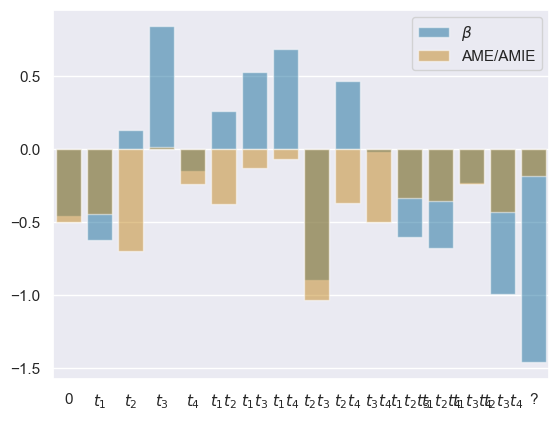

In [13]:
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_3 t_4$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_3 t_4$",
        r"$t_2 t_3 t_4$",
        r"?",
    ],
    y=ds.beta,
    alpha=0.5,
    label=r"$\beta$",
)
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_3 t_4$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_3 t_4$",
        r"$t_2 t_3 t_4$",
        r"?",
    ],
    y=np.hstack([results.params[:1], results.params[1:] * 2]),
    alpha=0.5,
    label=r"AME/AMIE",
)

In [14]:
n = 10000
k = 3
sigma = 0.1
order = 3
sparsity = 0.5

ds = BinomialFactorial(
    n=n,
    k=k,
    sigma=sigma,
    order=order,
    sparsity=sparsity,
    beta_seed=45,
)

In [15]:
t, y = ds.sample(seed=0)

In [16]:
T = preprocessing.PolynomialFeatures(
    degree=order + 1,
    interaction_only=True,
    include_bias=True,
).fit_transform(2 * t - 1)
print(T.shape)

m = sm.OLS(y, T)
results = m.fit()
print(results.summary())
print(ds.beta)

(10000, 8)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 2.044e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:20:36   Log-Likelihood:                 8684.1
No. Observations:               10000   AIC:                        -1.735e+04
Df Residuals:                    9992   BIC:                        -1.729e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2761      0.001   -271.6

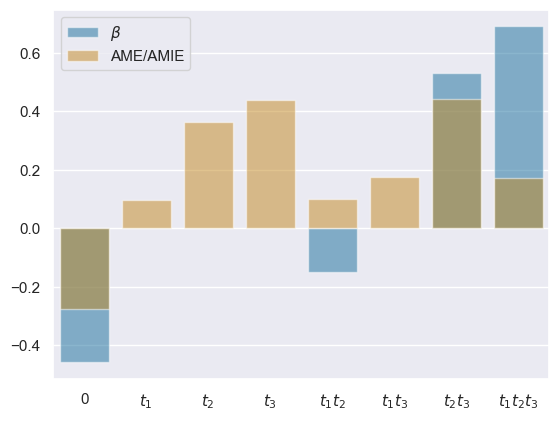

In [17]:
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_2 t_3$",
        r"$t_1 t_2 t_3$",
    ],
    y=ds.beta,
    alpha=0.5,
    label=r"$\beta$",
)
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_2 t_3$",
        r"$t_1 t_2 t_3$",
    ],
    y=np.hstack([results.params[:1], results.params[1:] * 2]),
    alpha=0.5,
    label=r"AME/AMIE",
)

In [18]:
# Convert NumPy arrays to pandas DataFrame
data = pd.DataFrame(t.astype("str"), columns=["t1", "t2", "t3"], dtype="category")
data["outcome"] = y

# Convert pandas DataFrame to R data.frame
with localconverter(ro.default_converter + pandas2ri.converter):
    r_data = ro.conversion.py2rpy(data)

ro.globalenv["r_data"] = r_data

fac_level = ro.IntVector([2, 2, 2])
ro.globalenv["fac_level"] = fac_level

_ = ro.r(
    """
fit <- CausalANOVA(formula=outcome ~ t1 + t2 + t3, family="gaussian", data=r_data, nway=3)
"""
)
print(ro.r("summary(fit)"))


Check: the number of levels for factors and whether they are ordered.
   levels ordered
t1      2   FALSE
t2      2   FALSE
t3      2   FALSE

Analyzing all two-way and three-way interactions...
 
Model:
 outcome ~ . * . * .
<environment: 0x159e263f8>
******
Range:
******
         range
t1       0.097
t2       0.363
t3       0.438
t1:t2    0.100
t1:t3    0.174
t2:t3    0.442
t1:t2:t3 0.172
*******************************
Average Marginal Effects (AME):
*******************************
 Factor Levels base     AME Std.Err  2.5%CI 97.5%CI
     t1    0.0      -0.0967   0.002 -0.1007 -0.0927
     t1    1.0  ***  0.0000   0.000  0.0000  0.0000
     t2    0.0      -0.3630   0.002 -0.3670 -0.3590
     t2    1.0  ***  0.0000   0.000  0.0000  0.0000
     t3    0.0      -0.4379   0.002 -0.4419 -0.4340
     t3    1.0  ***  0.0000   0.000  0.0000  0.0000

********************************************
Average Marginal Interaction Effects (AMIE):
********************************************
Two-way In

In [19]:
T = preprocessing.PolynomialFeatures(
    degree=order + 1,
    interaction_only=True,
    include_bias=True,
).fit_transform(t)
print(T.shape)

m = sm.OLS(y, T)
results = m.fit()
print(results.summary())
print(ds.beta)

(10000, 8)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 2.044e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:20:42   Log-Likelihood:                 8684.1
No. Observations:               10000   AIC:                        -1.735e+04
Df Residuals:                    9992   BIC:                        -1.729e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4531      0.003   -156.4

In [20]:
T = preprocessing.PolynomialFeatures(
    degree=order + 1,
    interaction_only=True,
    include_bias=True,
).fit_transform(2 * t - 1)
print(T.shape)

m = sm.OLS(y, T)
results = m.fit()
print(results.summary())
print(ds.beta)

(10000, 8)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 2.044e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:20:42   Log-Likelihood:                 8684.1
No. Observations:               10000   AIC:                        -1.735e+04
Df Residuals:                    9992   BIC:                        -1.729e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2761      0.001   -271.6

In [21]:
results.params[1:] * 2

array([0.09670226, 0.36301684, 0.43794137, 0.09974676, 0.17439905,
       0.44169848, 0.17211041])

In [22]:
ds.beta[1:]

array([ 0.        ,  0.        ,  0.        , -0.14849868,  0.        ,
        0.53166807,  0.6898073 ], dtype=float32)

In [23]:
print(results.params[0], y.mean())

-0.2761202738481833 -0.2793993098083621


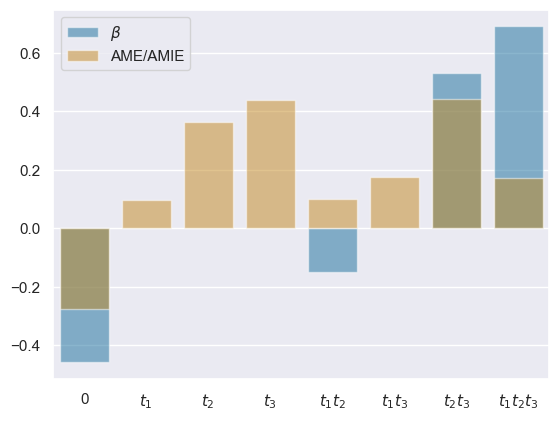

In [24]:
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_2 t_3$",
        r"$t_1 t_2 t_3$",
    ],
    y=ds.beta,
    alpha=0.5,
    label=r"$\beta$",
)
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_2 t_3$",
        r"$t_1 t_2 t_3$",
    ],
    y=np.hstack([results.params[:1], results.params[1:] * 2]),
    alpha=0.5,
    label=r"AME/AMIE",
)

In [25]:
T = preprocessing.PolynomialFeatures(
    degree=order + 1,
    interaction_only=True,
    include_bias=True,
).fit_transform(2 * t - 1).astype("float64")
print(T.shape)

m = sm.OLS(y.astype("float64"), T)
results = m.fit_regularized(
    method="sqrt_lasso",
    L1_wt=1.0,
    refit=True,
)
# print(results.summary())
print(ds.beta)

(10000, 8)


ValueError: sqrt_lasso fitting requires the cvxopt module

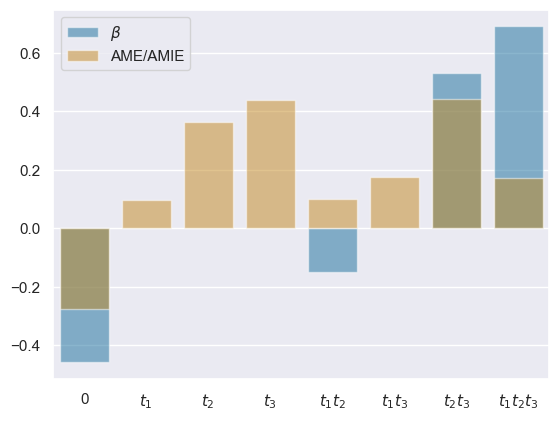

In [26]:
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_2 t_3$",
        r"$t_1 t_2 t_3$",
    ],
    y=ds.beta,
    alpha=0.5,
    label=r"$\beta$",
)
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_2 t_3$",
        r"$t_1 t_2 t_3$",
    ],
    y=np.hstack([results.params[:1], results.params[1:] * 2]),
    alpha=0.5,
    label=r"AME/AMIE",
)

In [27]:
class Bottling(object):
    def __init__(
        self,
        n,
        p_t=0.5,
        sigma=0.1,
        sparsity=0.5,
        beta_seed=42,
    ) -> None:
        self.k = 3
        self.order = 3
        self.n = n
        self.p_t = p_t
        self.sigma = sigma
        self.sparsity = sparsity
        self.beta_seed = beta_seed
        # initialize beta random number generator
        self.rng_beta = np.random.default_rng(beta_seed)
        # initialize interaction expansion transformation
        self.xfm = preprocessing.PolynomialFeatures(
            degree=self.order + 1, interaction_only=True, include_bias=True
        )
        _ = self.xfm.fit_transform(np.zeros((1, self.k), dtype="float32"))
        # sample ground truth betas
        self.beta = np.asarray([-2, 2.5, 1.5, 1.5, 0.5, -0.5, 0, 2]).astype("float32")
        zero_indices = self.rng_beta.choice(
            self.xfm.n_output_features_,
            size=int(self.xfm.n_output_features_ * self.sparsity),
            replace=False,
        )
        self.beta[zero_indices] = 0.0

    def sample(self, seed=None):
        self.rng = np.random.default_rng(seed)
        # sample treatment array
        t = self.rng.binomial(1, self.p_t, (self.n, self.k)).astype("float32")
        # expand treatment array
        T = self.xfm.fit_transform(t)
        # build response surface
        self.mu = T @ self.beta
        # sample outcome
        self.eps = self.rng.normal(0, self.sigma, size=self.n)
        y = self.mu + self.eps
        return t, y

In [28]:
n = 10000
sigma = 0.1
sparsity = 0.0

ds = Bottling(
    n=n,
    sigma=sigma,
    sparsity=sparsity,
    beta_seed=45,
)

In [29]:
t, y = ds.sample(seed=0)

In [30]:
T = preprocessing.PolynomialFeatures(
    degree=order + 1,
    interaction_only=True,
    include_bias=True,
).fit_transform(2 * t - 1)
print(T.shape)

m = sm.OLS(y, T)
results = m.fit()
print(results.summary())
print(ds.beta)

(10000, 8)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.239e+05
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:20:53   Log-Likelihood:                 8684.1
No. Observations:               10000   AIC:                        -1.735e+04
Df Residuals:                    9992   BIC:                        -1.729e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9997      0.001    983.7

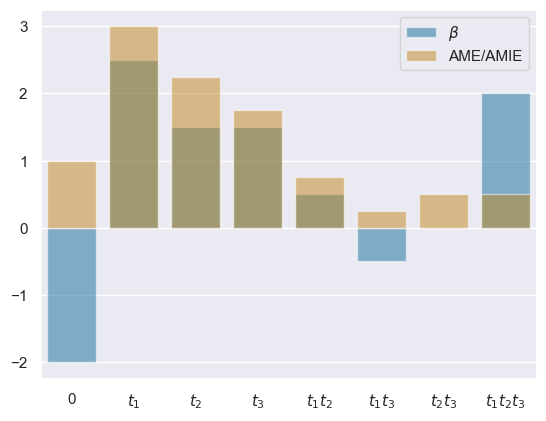

In [31]:
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_2 t_3$",
        r"$t_1 t_2 t_3$",
    ],
    y=ds.beta,
    alpha=0.5,
    label=r"$\beta$",
)
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_2 t_3$",
        r"$t_1 t_2 t_3$",
    ],
    y=np.hstack([results.params[:1], results.params[1:] * 2]),
    alpha=0.5,
    label=r"AME/AMIE",
)

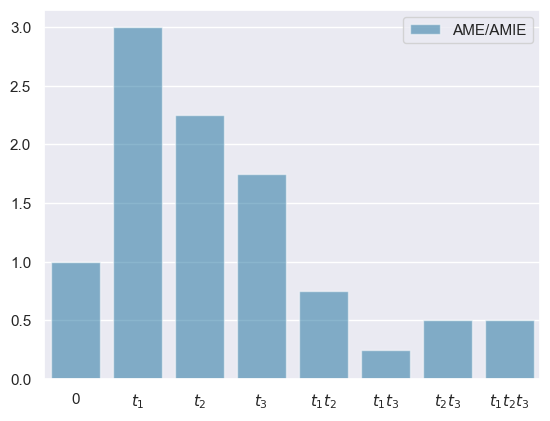

In [32]:
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_2 t_3$",
        r"$t_1 t_2 t_3$",
    ],
    y=np.hstack([results.params[:1], results.params[1:] * 2]),
    alpha=0.5,
    label=r"AME/AMIE",
)

In [33]:
# Convert NumPy arrays to pandas DataFrame
data = pd.DataFrame(t.astype("str"), columns=["t1", "t2", "t3"], dtype="category")
data["outcome"] = y

# Convert pandas DataFrame to R data.frame
with localconverter(ro.default_converter + pandas2ri.converter):
    r_data = ro.conversion.py2rpy(data)

ro.globalenv["r_data"] = r_data

fac_level = ro.IntVector([2, 2, 2])
ro.globalenv["fac_level"] = fac_level

_ = ro.r(
    """
fit <- CausalANOVA(formula=outcome ~ t1 + t2 + t3, family="gaussian", data=r_data, nway=3)
"""
)
print(ro.r("summary(fit)"))


Check: the number of levels for factors and whether they are ordered.
   levels ordered
t1      2   FALSE
t2      2   FALSE
t3      2   FALSE

Analyzing all two-way and three-way interactions...
 
Model:
 outcome ~ . * . * .
<environment: 0x155bc2348>
******
Range:
******
         range
t1       2.998
t2       2.249
t3       1.750
t1:t2    0.752
t1:t3    0.252
t2:t3    0.503
t1:t2:t3 0.500
*******************************
Average Marginal Effects (AME):
*******************************
 Factor Levels base     AME Std.Err  2.5%CI 97.5%CI
     t1    0.0      -2.9985   0.002 -3.0025 -2.9945
     t1    1.0  ***  0.0000   0.000  0.0000  0.0000
     t2    0.0      -2.2490   0.002 -2.2530 -2.2450
     t2    1.0  ***  0.0000   0.000  0.0000  0.0000
     t3    0.0      -1.7497   0.002 -1.7536 -1.7457
     t3    1.0  ***  0.0000   0.000  0.0000  0.0000

********************************************
Average Marginal Interaction Effects (AMIE):
********************************************
Two-way In